In [2]:
import numpy as np
import numdifftools as nd
from scipy import optimize
import matplotlib.pyplot as plt
import time

In [3]:
def f2(x):  # x list with length 2
    """The Rosenbrock Banana Function"""
    return (1 - x[0]) ** 2 + 100 * (x[1] - x[0] ** 2) ** 2


def f2_gradient(x):  # x list with length 2
    """Gradient of the Rosenbrock Banana Function"""
    return np.array([-400 * (x[1] - x[0] ** 2) * x[0] - 2 * (1 - x[0]), 200 * (x[1] - x[0] ** 2)])


def f2_hessian(x):
    """Hessian Matrix of the Rosenbrock Banana Function"""
    return np.array([[1200 * x[0] ** 2 - 400 * x[1] + 2, -400 * x[0]], [-400 * x[0], 200]])


In [4]:
def cal_fun(xs, fun):
    res = []
    for x in xs:
        res.append(fun(x))
    return np.array(res)


def cal_quo(y1, y2):
    res = []
    for i in range(len(y1)):
        res.append(y1[i]/y2[i])
    #print(res)
    return np.array(res)

In [5]:
def plot_function(xs, fun, name):
    ys = cal_fun(xs, fun)
    y1 = ys[1:]
    y2 = ys[:-1]
    quo = cal_quo(y1, y2)
    it = np.arange(ys.shape[0]-1)
    plt.plot(it, quo, 'b', label="alpha=1")
    plt.yscale("log")
    plt.title(name)
    plt.xlabel("iteration")
    plt.ylabel("f(x_k)/f(x_k-1)")
    plt.legend()

In [6]:
def backtracking(p, x, fun, fun_g, alpha=1.0, rho=0.6, c=1e-4):
    while fun(x+alpha*p) > fun(x) + c * alpha * np.dot(fun_g(x), p):
        alpha = rho * alpha
    return alpha

In [7]:
def steepest_descent(_x, fun, fun_g, max_iter=100, name=""):
    x = _x
    count = 0
    gradient = []
    xs = []
    while np.linalg.norm(fun_g(x)) > 1e-6 and count < max_iter:
        p = -fun_g(x)
        alpha = backtracking(p, x, fun, fun_g)
        # alpha = backtracking_LS(x, fun, fun_g, p)
        x += alpha * p
        xx = list(x)
        gradient.append(fun_g(x))
        xs.append(xx)
        count += 1
    # print("steepest steps:", count)
    plot_gradient(np.array(gradient), "Steepest Descent - "+name)
    # plot_function(np.array(xs), fun, "Steepest Descent - "+name)
    # plot_distance(np.array(xs), "Steepest Descent - "+name)
    # plot_convergence(np.array(xs), fun, "Steepest Descent", 'c')
    return x, fun(x), count
    #return x

In [8]:
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

def plot_gradient(g, name):
    it = np.arange(g.shape[0])
    plt.plot(it, np.linalg.norm(g, axis=1), 'b', label="alpha=1")
    plt.yscale("log")
    plt.title(name)
    plt.xlabel("iteration")
    plt.ylabel("gradient")

def plot_distance(xs, name):
    _x = xs[-1]
    it = np.arange(xs.shape[0])
    plt.plot(it, np.linalg.norm(xs-_x, axis=1), 'b')
    plt.yscale("log")
    plt.title(name)
    plt.xlabel("iteration")
    plt.ylabel("distance of x & x*")
    plt.show()

In [9]:
def newton(_x, fun, fun_g, fun_h, beta=1e-3, max_iter=100, name=""):
    x = _x
    count = 0
    gradient = []
    xs = []
    while np.linalg.norm(fun_g(x)) > 1e-8:
        hessian = fun_h(x)
        if not is_pos_def(hessian):
            diag = hessian.diagonal()
            min_diag = np.amin(diag)
            tol = 0
            if min_diag <= 0:
                tol = -min_diag + beta
            d = hessian.shape[0]
            hessian_modi = hessian + tol * np.identity(d)
            while not is_pos_def(hessian_modi):
                tol = max(2*tol, beta)
                hessian_modi = hessian + tol * np.identity(d)
        else:
            hessian_modi = hessian
        p = - np.linalg.inv(hessian_modi) @ fun_g(x)
        alpha = backtracking(p, x, fun, fun_g)
        x += alpha * p
        xx = list(x)
        gradient.append(fun_g(x))
        xs.append(xx)
        count += 1
    # print("Newton steps:", count)
    plot_gradient(np.array(gradient), "Newton's Method - "+name)
    #plot_distance(np.array(xs), "Newton's Method - "+name)
    # plot_convergence(np.array(xs), fun, "Newton's Method")
    return x
    # return x, fun(x), count

Rosenbrock test


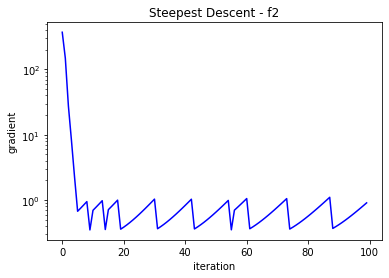

In [10]:
# 上下波动
def test_2(x):
    print("Rosenbrock test")
    res1 = steepest_descent(np.array(x), f2, f2_gradient, name="f2")
    #print(res1)
    #print(func.Rosenbrock(res1))

test_2([1.0,2.0])

In [11]:
#f3 backtracking 小收敛慢， backtracking 参数大收敛快

Newton test


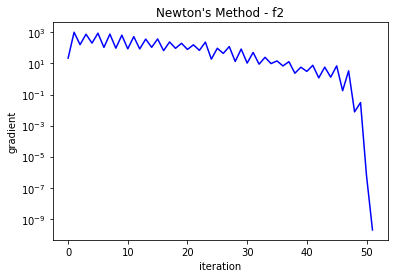

In [12]:
def test_2_2(x):
    print("Newton test")
    res2 = newton(np.array(x), f2, f2_gradient, f2_hessian, name="f2")
    #print(res1)
    #print(func.Rosenbrock(res1))

test_2_2([-10,10.0])

In [13]:
def testing(fun, fun_g, fun_h, length=2, name=""):
    time_s = 0
    time_n = 0
    iter_s = 0
    iter_n = 0
    succ_s = 0
    succ_n = 0
    val_s = 0
    val_n = 0
    for i in range(100):
        x = np.random.rand(length) * 5

        tmp1 = time.process_time()
        x_, val, c = steepest_descent(x, fun, fun_g)
        tmp2 = time.process_time()
        time_s += tmp2-tmp1
        iter_s += c
        val_s += val
        if np.linalg.norm(fun_g(x_)) <= 1e-6:
            succ_s += 1  

    print(name, "\nSteepest:", time_s/100, iter_s/100, succ_s/100, val_s/100, '\n')

f2 
Steepest: 0.0203125 100.0 0.0 0.9897427158551428 



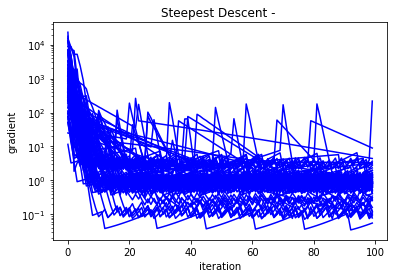

In [14]:
# testing(func.ellipsoid, func.ellipsoid_d1, func.ellipsoid_d2, name="f1")
testing(f2, f2_gradient, f2_hessian, name="f2")
# testing(func.log_ellipsoid, func.log_ellipsoid_d1, func.log_ellipsoid_d2, name="f3")
# testing(func.f_4, func.f_4grad, func.f_4hessian, name="f4")
# testing(func.f_5, func.f_5grad, func.f_5hessian, name="f5")